In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

568

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e39a9ed129ac8f6e77b699dd51a10283


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | mayumba
Processing Record 2 of Set 12 | busselton
Processing Record 3 of Set 12 | carballo
Processing Record 4 of Set 12 | mataura
Processing Record 5 of Set 12 | jamestown
Processing Record 6 of Set 12 | cedar city
Processing Record 7 of Set 12 | ribeira grande
Processing Record 8 of Set 12 | lavrentiya
Processing Record 9 of Set 12 | ilulissat
Processing Record 10 of Set 12 | bredasdorp
Processing Record 11 of Set 12 | luena
Processing Record 12 of Set 12 | bluff
Processing Record 13 of Set 12 | kapaa
Processing Record 14 of Set 12 | saleaula
City not found. Skipping...
Processing Record 15 of Set 12 | ushuaia
Processing Record 16 of Set 12 | dikson
Processing Record 17 of Set 12 | ponta do sol
Processing Record 18 of Set 12 | ipixuna
Processing Record 19 of Set 12 | port elizabeth
Processing Record 20 of Set 12 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 12 | tasii

Processing Record 37 of Set 15 | dubbo
Processing Record 38 of Set 15 | upernavik
Processing Record 39 of Set 15 | urucara
Processing Record 40 of Set 15 | victoria
Processing Record 41 of Set 15 | saravan
Processing Record 42 of Set 15 | geraldton
Processing Record 43 of Set 15 | arraial do cabo
Processing Record 44 of Set 15 | linxia
Processing Record 45 of Set 15 | taga
Processing Record 46 of Set 15 | tiksi
Processing Record 47 of Set 15 | kirakira
Processing Record 48 of Set 15 | beloha
Processing Record 49 of Set 15 | anadyr
Processing Record 50 of Set 15 | port lincoln
Processing Record 1 of Set 16 | egvekinot
Processing Record 2 of Set 16 | walvis bay
Processing Record 3 of Set 16 | laguna
Processing Record 4 of Set 16 | sapozhok
Processing Record 5 of Set 16 | hambantota
Processing Record 6 of Set 16 | eydhafushi
Processing Record 7 of Set 16 | akdepe
Processing Record 8 of Set 16 | henties bay
Processing Record 9 of Set 16 | amahai
Processing Record 10 of Set 16 | whitehorse


City not found. Skipping...
Processing Record 24 of Set 19 | sorvag
City not found. Skipping...
Processing Record 25 of Set 19 | kupang
Processing Record 26 of Set 19 | reconquista
Processing Record 27 of Set 19 | tosya
Processing Record 28 of Set 19 | dangriga
Processing Record 29 of Set 19 | iskateley
Processing Record 30 of Set 19 | kropotkin
Processing Record 31 of Set 19 | yerkoy
Processing Record 32 of Set 19 | lappeenranta
Processing Record 33 of Set 19 | sonoita
Processing Record 34 of Set 19 | storslett
Processing Record 35 of Set 19 | skibbereen
Processing Record 36 of Set 19 | guanica
Processing Record 37 of Set 19 | saint-pierre
Processing Record 38 of Set 19 | olafsvik
Processing Record 39 of Set 19 | pamplona
Processing Record 40 of Set 19 | ozernovskiy
Processing Record 41 of Set 19 | faro
Processing Record 42 of Set 19 | meulaboh
Processing Record 43 of Set 19 | bilibino
Processing Record 44 of Set 19 | sao joao da barra
Processing Record 45 of Set 19 | pareora
Processi

Processing Record 10 of Set 23 | pandan
Processing Record 11 of Set 23 | temaraia
City not found. Skipping...
Processing Record 12 of Set 23 | sarahan
Processing Record 13 of Set 23 | malanje
Processing Record 14 of Set 23 | cabra
Processing Record 15 of Set 23 | charagua
Processing Record 16 of Set 23 | anton lizardo
Processing Record 17 of Set 23 | qeshm
Processing Record 18 of Set 23 | codajas
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mayumba,-3.4320,10.6554,79.32,78,100,5.79,GA,2021-03-26 19:36:07
1,Busselton,-33.6500,115.3333,46.99,93,61,5.70,AU,2021-03-26 19:33:02
2,Carballo,43.2130,-8.6910,50.00,81,62,3.96,ES,2021-03-26 19:36:07
3,Mataura,-46.1927,168.8643,57.99,79,100,3.00,NZ,2021-03-26 19:36:08
4,Jamestown,42.0970,-79.2353,41.00,93,90,17.34,US,2021-03-26 19:35:04
5,Cedar City,37.6775,-113.0619,37.40,65,90,17.27,US,2021-03-26 19:32:36
6,Ribeira Grande,38.5167,-28.7000,62.60,51,20,12.66,PT,2021-03-26 19:36:09
7,Lavrentiya,65.5833,-171.0000,-1.97,86,100,7.52,RU,2021-03-26 19:36:09
8,Ilulissat,69.2167,-51.1000,-7.60,45,1,1.30,GL,2021-03-26 19:36:10
9,Bredasdorp,-34.5322,20.0403,64.40,68,0,8.05,ZA,2021-03-26 19:34:13


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mayumba,GA,2021-03-26 19:36:07,-3.4320,10.6554,79.32,78,100,5.79
1,Busselton,AU,2021-03-26 19:33:02,-33.6500,115.3333,46.99,93,61,5.70
2,Carballo,ES,2021-03-26 19:36:07,43.2130,-8.6910,50.00,81,62,3.96
3,Mataura,NZ,2021-03-26 19:36:08,-46.1927,168.8643,57.99,79,100,3.00
4,Jamestown,US,2021-03-26 19:35:04,42.0970,-79.2353,41.00,93,90,17.34
5,Cedar City,US,2021-03-26 19:32:36,37.6775,-113.0619,37.40,65,90,17.27
6,Ribeira Grande,PT,2021-03-26 19:36:09,38.5167,-28.7000,62.60,51,20,12.66
7,Lavrentiya,RU,2021-03-26 19:36:09,65.5833,-171.0000,-1.97,86,100,7.52
8,Ilulissat,GL,2021-03-26 19:36:10,69.2167,-51.1000,-7.60,45,1,1.30
9,Bredasdorp,ZA,2021-03-26 19:34:13,-34.5322,20.0403,64.40,68,0,8.05


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

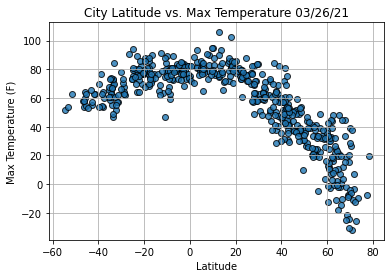

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

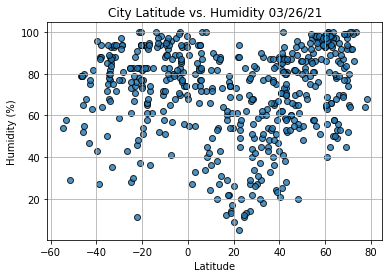

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

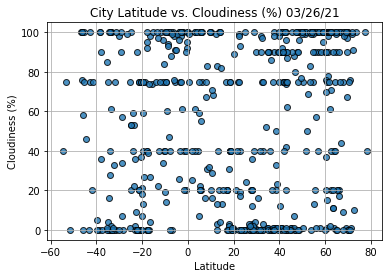

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

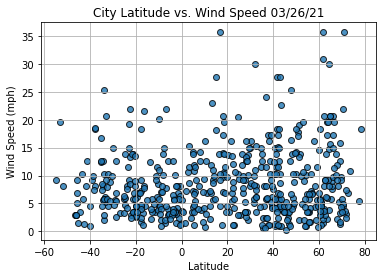

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2021-03-26 19:36:11
Lat                         -54.8
Lng                         -68.3
Max Temp                     51.8
Humidity                       54
Cloudiness                     40
Wind Speed                   9.22
Name: 13, dtype: object

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Carballo,ES,2021-03-26 19:36:07,43.2130,-8.6910,50.00,81,62,3.96
4,Jamestown,US,2021-03-26 19:35:04,42.0970,-79.2353,41.00,93,90,17.34
5,Cedar City,US,2021-03-26 19:32:36,37.6775,-113.0619,37.40,65,90,17.27
6,Ribeira Grande,PT,2021-03-26 19:36:09,38.5167,-28.7000,62.60,51,20,12.66
7,Lavrentiya,RU,2021-03-26 19:36:09,65.5833,-171.0000,-1.97,86,100,7.52


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

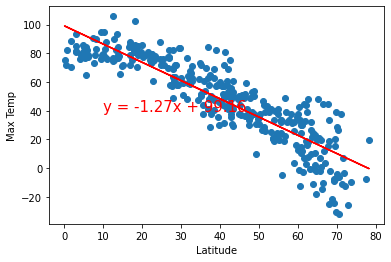

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

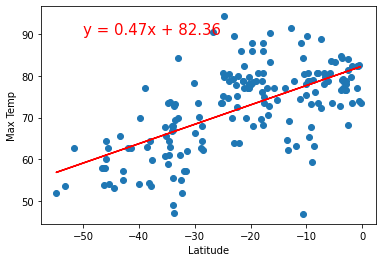

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

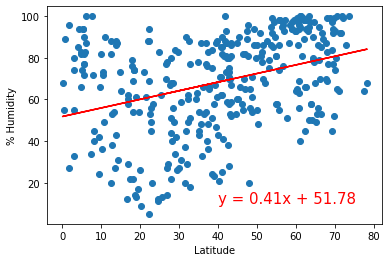

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

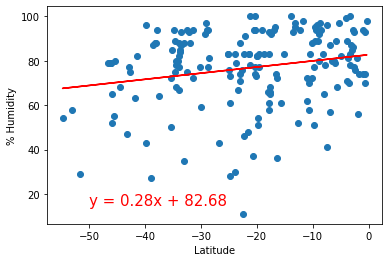

In [30]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

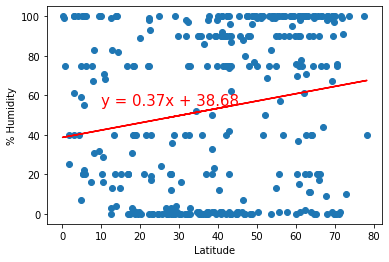

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(10,55))

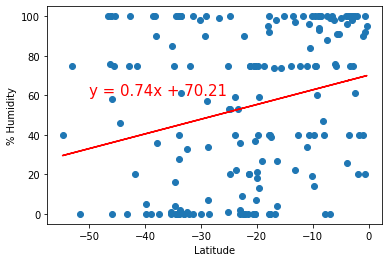

In [34]:
# Linear regression on the southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,60))

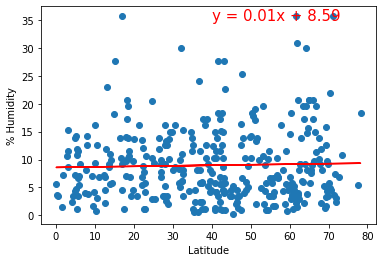

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,35))

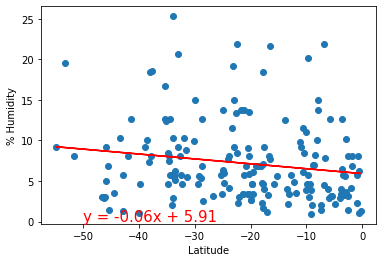

In [40]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,0))